In [1]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
file_path = 'dataset/綜合特徵集.csv'
data = pd.read_csv(file_path)

In [5]:
data["label"].value_counts(normalize=True)

1    0.534368
0    0.465632
Name: label, dtype: float64

In [6]:
# 清理資料，刪除缺失值
data_clean = data.dropna()

In [7]:
# 分離特徵（X）與標籤（y）
X = data_clean.drop(columns=['label'])
y = data_clean['label']

In [8]:
# 使用 LabelEncoder 對類別特徵進行編碼
label_encoder = LabelEncoder()
X['version'] = label_encoder.fit_transform(X['version'])
X['cipher'] = label_encoder.fit_transform(X['cipher'])
X['curve'] = label_encoder.fit_transform(X['curve'])
X['certificate'] = label_encoder.fit_transform(X['certificate'])

In [9]:
# 將特徵數據進行標準化
scaler = StandardScaler()
train_data = scaler.fit_transform(X)

In [14]:
# 初始化 XGBoost 模型，設置較小的樹數量（n_estimators）以加速訓練
xgb_model = xgb.XGBClassifier(n_estimators=5, use_label_encoder=True, eval_metric='logloss')

In [15]:
# k-fold 交叉驗證
kf = KFold(n_splits=5)
acc_scores = cross_val_score(xgb_model, train_data, y, cv=kf, scoring='accuracy')
pre_scores = cross_val_score(xgb_model, train_data, y, cv=kf, scoring='precision')
rec_scores = cross_val_score(xgb_model, train_data, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(xgb_model, train_data, y, cv=kf, scoring='f1')

/home/salab/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/salab/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/salab/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/salab/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:29:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/salab/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:29:49] WARNING: /workspace/src/lea

In [16]:
# 訓練模型
xgb_model.fit(train_data, y)

/home/salab/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:29:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
file_path = 'dataset//IoT23特徵集.csv' #IoT23 USTC
data = pd.read_csv(file_path)

# 清理資料，刪除缺失值
data_clean = data.dropna()

# 分離特徵（X）與標籤（y）
X = data_clean.drop(columns=['label'])
y_test = data_clean['label']

# 使用 LabelEncoder 對類別特徵進行編碼
label_encoder = LabelEncoder()
X['version'] = label_encoder.fit_transform(X['version'])
X['cipher'] = label_encoder.fit_transform(X['cipher'])
X['curve'] = label_encoder.fit_transform(X['curve'])
X['certificate'] = label_encoder.fit_transform(X['certificate'])

# 將特徵數據進行標準化
scaler = StandardScaler()
test_data = scaler.fit_transform(X)

In [25]:
# 在測試資料上進行預測
y_pred = xgb_model.predict(test_data)

In [26]:
# 計算模型的 accuracy, precision, recall 和 f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
# 結果的 DataFrame 顯示
test_results = {
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1-Score': [f1]
}

results_df = pd.DataFrame(test_results)
results_df

,Accuracy,Precision,Recall,F1-Score
0,0.721154,1.0,0.697917,0.822086


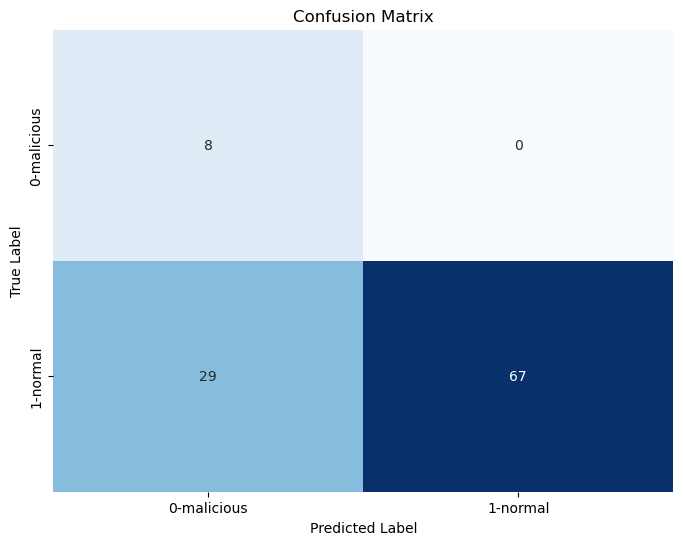

In [28]:
# 生成 confusion matrix (混淆矩陣)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['0-malicious', '1-normal'], yticklabels=['0-malicious', '1-normal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()